In [107]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [108]:
# Grabbing the nominees
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'BEST PICTURE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    statement = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    sub_result['film_title'] = film_title
                    sub_result['statement'] = statement
                    sub_result['nominee'] = 1
                    if sub.find('span',{'class':'glyphicon glyphicon-star'}):
                        sub_result['winner'] = 1
                    else:
                        sub_result['winner'] = 0
                        
                    result[film_title] = sub_result
                    
        except Exception:
            pass
    return result

In [109]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

In [110]:
best_2018

{'Black Panther': {'film_title': 'Black Panther',
  'statement': 'Kevin Feige, Producer',
  'nominee': 1,
  'winner': 0},
 'BlacKkKlansman': {'film_title': 'BlacKkKlansman',
  'statement': 'Sean McKittrick, Jason Blum, Raymond Mansfield, Jordan Peele and Spike Lee, Producers',
  'nominee': 1,
  'winner': 0},
 'Bohemian Rhapsody': {'film_title': 'Bohemian Rhapsody',
  'statement': 'Graham King, Producer',
  'nominee': 1,
  'winner': 0},
 'The Favourite': {'film_title': 'The Favourite',
  'statement': 'Ceci Dempsey, Ed Guiney, Lee Magiday and Yorgos Lanthimos, Producers',
  'nominee': 1,
  'winner': 0},
 'Green Book': {'film_title': 'Green Book',
  'statement': 'Jim Burke, Charles B. Wessler, Brian Currie, Peter Farrelly and Nick Vallelonga, Producers',
  'nominee': 1,
  'winner': 1},
 'Roma': {'film_title': 'Roma',
  'statement': 'Gabriela Rodríguez and Alfonso Cuarón, Producers',
  'nominee': 1,
  'winner': 0},
 'A Star Is Born': {'film_title': 'A Star Is Born',
  'statement': 'Bill Ge

In [111]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_all_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','winner','movieName','filmInfo'])
df_all_movies = pd.read_csv('movies.csv')
df_all_credits = pd.read_csv('credits.csv')
df2018_all_movies = pd.read_csv('2018_best_picture_tmdb.csv')
df1617_movies = pd.read_csv('2016_2017_best_picture_tmdb.csv')
#df_credits = df_credits.append(df2018_movies)

df_all_awards


,year,ceremony,award,winner,movieName,filmInfo
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [112]:
# append the data we scrapped to the df_allawards
data = []
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Best Picture', v['nominee'], v['film_title'], v['statement']])
    data.append(row[0])
  
for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Best Picture', v['nominee'], v['film_title'], v['statement']])
    data.append(row[0])

for k,v in best_2018.items():
   row = []
   row.append(['2018', 91, 'Best Picture', v['nominee'], v['film_title'], v['statement']])
   data.append(row[0])

#data #Looks good

In [113]:
# pass the column name to the columns!!! Or there will be a runtime error
df_all_awards=df_all_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','winner','movieName','filmInfo']),ignore_index=True)
#df_awards 
#df_awards.loc[df_awards['award'] == 'Best Picture']
#9982 rows × 6 columns, no duplicate entries
# df_awards.to_csv('awards.csv')
df_all_awards

,year,ceremony,award,winner,movieName,filmInfo
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [114]:
# Data Manipulation - Joining the dataframes
# We start by saving only the movies we have credits info for and merge on the same movie id

if 'title' in df_all_credits.columns: 
    df_all_credits = df_all_credits.drop('title',axis=1) 
    
df_all_credits_movies = df_all_credits.set_index('movie_id').join(df_all_movies.set_index('id'))

# 9982 rows --> 4803 rows x 21 columns

In [115]:
df_all_credits_movies.dtypes

cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [116]:
df2018_all_movies['release_date'] = pd.to_datetime(df2018_all_movies['release_date'], format='%Y/%m/%d')


In [117]:
df1617_movies['release_date'] = pd.to_datetime(df1617_movies['release_date'], format='%Y-%m-%d')
df1617_movies.release_date

0    2016-11-10
1    2016-12-16
2    2016-10-07
3    2016-08-12
4    2016-12-10
5    2016-11-29
6    2016-11-24
7    2016-11-18
8    2016-10-21
9    2017-09-01
10   2017-11-22
11   2017-07-19
12   2017-02-24
13   2017-09-08
14   2017-12-25
15   2017-12-22
16   2017-12-01
17   2017-11-10
Name: release_date, dtype: datetime64[ns]

In [118]:
df_all_credits_movies = df_all_credits_movies.append(df2018_all_movies)
df_all_credits_movies = df_all_credits_movies.append(df1617_movies)

In [119]:
# df2016_2017_movies['release_date'] = pd.to_datetime(df2016_2017_movies['release_date'], format='%m/%d/%y')

In [120]:
df_all_credits_movies['release_date'] = pd.to_datetime(df_all_credits_movies['release_date'], format='%Y-%m-%d')
#df_credits_movies.loc[df_credits_movies['release_date'] == '2017-02-03']

In [121]:
#df_credits_movies.dtypes

# Reset the data types and get the earliest date of release_date
#df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'])
#get the earliest release date from the dataset
min_year = min(df_all_credits_movies['release_date']) #1916-09-04
max_year = max(df_all_credits_movies['release_date']) #2017-02-03
print(min_year)
print(max_year)

1916-09-04 00:00:00
2018-12-25 00:00:00


In [172]:
df_all_credits_movies['year2'] = df_all_credits_movies['release_date'].dt.year
#df_all_credits_movies.drop_duplicates(['crew'])
df_all_credits_movies
df_all_credits_movies.loc[df_all_credits_movies['year2'] == 2016.0]
# df_all_credits_movies['nominee']
#df_credits_movies.loc[df_credits_movies['title'] == 'Star Trek Beyond']

,budget,cast,crew,genres,homepage,keywords,movie_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year2,movie_title
209112,250000000,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",NaN,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,...,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,2016.0,batman v superman dawn of justice
271110,250000000,"[{""cast_id"": 9, ""character"": ""Steve Rogers / C...","[{""credit_id"": ""569443d59251414b67000428"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://marvel.com/captainamericapremiere,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 6091...",NaN,en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",...,1153304495,147.0,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103...",Released,Divided We Fall,Captain America: Civil War,7.1,7241,2016.0,captain america civil war
188927,185000000,"[{""cast_id"": 9, ""character"": ""James T. Kirk"", ...","[{""credit_id"": ""52fe4d489251416c751360bb"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",NaN,en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,...,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568,2016.0,star trek beyond
258489,180000000,"[{""cast_id"": 1, ""character"": ""John Clayton / T...","[{""credit_id"": ""551b7049c3a3687682001710"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://legendoftarzan.com,"[{""id"": 409, ""name"": ""africa""}, {""id"": 5650, ""...",NaN,en,The Legend of Tarzan,"Tarzan, having acclimated to life in London, i...",...,356743061,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Human. Nature.,The Legend of Tarzan,5.5,2430,2016.0,the legend of tarzan
246655,178000000,"[{""cast_id"": 14, ""character"": ""Professor Charl...","[{""credit_id"": ""56d0c8fdc3a3681e36006b60"", ""de...","[{""id"": 878, ""name"": ""Science Fiction""}]",http://www.foxmovies.com/movies/x-men-apocalypse,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 4769, ...",NaN,en,X-Men: Apocalypse,After the re-emergence of the world's first mu...,...,543934787,144.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the strong will survive,X-Men: Apocalypse,6.4,4721,2016.0,xmen apocalypse
297761,175000000,"[{""cast_id"": 9, ""character"": ""Floyd Lawton / D...","[{""credit_id"": ""58415a5a9251417d590062b1"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.suicidesquad.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 1296...",NaN,en,Suicide Squad,"From DC Comics comes the Suicide Squad, an ant...",...,745000000,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Worst Heroes Ever,Suicide Squad,5.9,7458,2016.0,suicide squad
278927,175000000,"[{""cast_id"": 12, ""character"": ""Mowgli"", ""credi...","[{""credit_id"": ""571507b692514105a80032f0"", ""de...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",http://movies.disney.com/the-jungle-book-2016,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",NaN,en,The Jungle Book,After a threat from the tiger Shere Khan force...,...,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Jungle Book,6.7,2892,2016.0,the jungle book
47933,165000000,"[{""cast_id"": 5, ""character"": ""Jake Morrison"", ...","[{""credit_id"": ""5763d39cc3a36860a5000168"", ""de...","[{""id"": 28, ""name"

In [123]:
df_all_credits_movies.to_csv('df_credits_movies_test.csv', index=False)

In [124]:
# Select movies that are only in Outstanding Picture or Best Picture awards category and create a new df, df_picture_awards
df_all_picture_awards = df_all_awards.loc[df_all_awards['award'].isin(['Outstanding Picture','Best Picture'])]
df_all_picture_awards.reset_index(drop = True, inplace = True)
#332 Rows

# Get only movies that hae been released
df_all_credits_movies = df_all_credits_movies.loc[df_all_credits_movies['status'].isin(['Released'])]
df_all_credits_movies
df_all_picture_awards[df_all_picture_awards['year']=='2016']
#print("--------------")
#print(df_picture_awards.columns)
#print("--------------")
#print(df_credits_movies.columns)

,year,ceremony,award,winner,movieName,filmInfo
306,2016,89,Best Picture,1.0,Arrival,"Shawn Levy, Dan Levine, Aaron Ryder and David ..."
307,2016,89,Best Picture,1.0,Fences,"Scott Rudin, Denzel Washington and Todd Black,..."
308,2016,89,Best Picture,1.0,Hacksaw Ridge,"Bill Mechanic and David Permut, Producers"
309,2016,89,Best Picture,1.0,Hell or High Water,"Carla Hacken and Julie Yorn, Producers"
310,2016,89,Best Picture,1.0,Hidden Figures,"Donna Gigliotti, Peter Chernin, Jenno Topping,..."
311,2016,89,Best Picture,1.0,La La Land,"Fred Berger, Jordan Horowitz and Marc Platt, P..."
312,2016,89,Best Picture,1.0,Lion,"Emile Sherman, Iain Canning and Angie Fielder,..."
313,2016,89,Best Picture,1.0,Manchester by the Sea,"Matt Damon, Kimberly Steward, Chris Moore, Lau..."
314,2016,89,Best Picture,1.0,Moonlight,"Adele Romanski, Dede Gardner and Jeremy Kleine..."


In [125]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_all_picture_awards['winner'].fillna(1,inplace = True)
df_all_picture_awards[df_all_picture_awards['year']=='2016']

,year,ceremony,award,winner,movieName,filmInfo
306,2016,89,Best Picture,1.0,Arrival,"Shawn Levy, Dan Levine, Aaron Ryder and David ..."
307,2016,89,Best Picture,1.0,Fences,"Scott Rudin, Denzel Washington and Todd Black,..."
308,2016,89,Best Picture,1.0,Hacksaw Ridge,"Bill Mechanic and David Permut, Producers"
309,2016,89,Best Picture,1.0,Hell or High Water,"Carla Hacken and Julie Yorn, Producers"
310,2016,89,Best Picture,1.0,Hidden Figures,"Donna Gigliotti, Peter Chernin, Jenno Topping,..."
311,2016,89,Best Picture,1.0,La La Land,"Fred Berger, Jordan Horowitz and Marc Platt, P..."
312,2016,89,Best Picture,1.0,Lion,"Emile Sherman, Iain Canning and Angie Fielder,..."
313,2016,89,Best Picture,1.0,Manchester by the Sea,"Matt Damon, Kimberly Steward, Chris Moore, Lau..."
314,2016,89,Best Picture,1.0,Moonlight,"Adele Romanski, Dede Gardner and Jeremy Kleine..."


In [126]:
# join df_credits_movies and df_picture_awards by movie name

# Change the title in the movie to lower case
import re
movieName = [re.sub(r'[^\w\s]','',x) for x in df_all_picture_awards['movieName'].str.lower().str.strip().values]
title = [re.sub(r'[^\w\s]','',x) for x in df_all_credits_movies['title'].str.lower().str.strip().values]

df_all_picture_awards.loc[:,'movie_title'] = movieName 
df_all_credits_movies.loc[:,'movie_title'] = title

# check the dataframe, we can see the string in movie_title now is valid
#df_picture_awards.movie_title

In [170]:
# join the two tables, merge the data
df = df_all_picture_awards.merge(df_all_credits_movies, left_on='movie_title', right_on='movie_title', how='right')
df = df.reset_index(drop=True)
df['actual_winner']

,year,ceremony,award,winner,movieName,filmInfo,movie_title,budget,cast,crew,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year2
0,1962,35.0,Best Picture,1.0,Lawrence of Arabia,"Sam Spiegel, Producer",lawrence of arabia,15000000,"[{""cast_id"": 18, ""character"": ""T.E. Lawrence"",...","[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...",...,1962-12-10,69995385,216.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,NaN,Lawrence of Arabia,7.8,851,1962.0
1,1962,35.0,Best Picture,1.0,The Longest Day,"Darryl F. Zanuck, Producer",the longest day,10000000,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...",...,1962-09-25,50100000,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,This is the day that changed the world... When...,The Longest Day,7.2,234,1962.0
2,1962,35.0,Best Picture,1.0,To Kill a Mockingbird,"Alan J. Pakula, Producer",to kill a mockingbird,2000000,"[{""cast_id"": 8, ""character"": ""Atticus Finch"", ...","[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...",...,1962-12-25,13129846,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,To Kill a Mockingbird,8.0,657,1962.0
3,1963,36.0,Best Picture,1.0,Cleopatra,"Walter Wanger, Producer",cleopatra,31115000,"[{""cast_id"": 2, ""character"": ""Cleopatra"", ""cre...","[{""credit_id"": ""54afb978c3a3683fba003e96"", ""de...",...,1963-06-12,71000000,248.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The motion picture the world has been waiting ...,Cleopatra,6.7,146,1963.0
4,1963,36.0,Best Picture,1.0,Tom Jones,"Tony Richardson, Producer",tom jones,1000000,"[{""cast_id"": 6, ""character"": ""Tom Jones"", ""cre...","[{""credit_id"": ""52fe4421c3a36847f8084037"", ""de...",...,1963-10-06,37600000,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tom Jones! . . . loves and loves and loves and...,Tom Jones,6.1,39,1963.0
5,1964,37.0,Best Picture,1.0,Dr. Strangelove or: How I Learned to Stop Worr...,"Stanley Kubrick, Producer",dr strangelove or how i learned to stop worryi...,1800000,"[{""cast_id"": 13, ""character"": ""Group Capt. Lio...","[{""credit_id"": ""52fe4290c3a36847f802879d"", ""de...",...,1964-01-29,9440272,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot-line suspense comedy,Dr. Strangelove or: How I Learned to Stop Worr...,8.0,1442,1964.0
6,1964,37.0,Best Picture,1.0,Mary Poppins,"Walt Disney and Bill Walsh, Producers",mary poppins,6000000,"[{""cast_id"": 1, ""character"": ""Mary Poppins"", ""...","[{""credit_id"": ""52fe4243c3a36847f8010859"", ""de...",...,1964-08-27,102272727,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's supercalifragilisticexpialidocious!,Mary Poppins,7.4,1183,1964.0
7,1964,37.0,Best Picture,1.0,My Fair Lady,"Jack L. Warner, Producer",my fair lady,17000000,"[{""cast_id"": 1, ""character"": ""Eliza Doolittle""...","[{""credit_id"": ""52fe43fb9251416c75024edb"", ""de...",...,1964-10-21,72070731,170.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The loverliest motion picture of them all!,My Fair Lady,7.4,352,1964.0
8,1965,38.0,Best Picture,1.0,Doctor Zhivago,"Carlo Ponti, Producer",doctor zhivago,11000000,"[{""cast_id"": 18, ""character"": ""Dr. Yuri Zhivag...","[{""credit_id"": ""52fe428bc3a36847f8026fa1"", ""de...",...,1965-12-22,111858363,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Turbulent were the times and fiery was the lov...,Doctor Zhivago,7.4,247,1965.0
9,1965,38.0,Best Picture,1.0,The Sound of Music,"Robert Wise, Producer",the sound of music,8200000,"[{""cast_id"": 1, ""character"": ""Maria"", ""credit_...","[{""credit_id"": ""52fe463b9251416c75071a61"", ""de...",...,1965-03-02,286214286,174.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The happiest sound in all the world!,The Sound of Music,7.4,941,1965.0


In [128]:


# @Priya - PROBLEM HERE? WE'RE GETTING JUNK DATA AT THE END OF OUR MASTERLIST.CSV, PRETTY SURE IT'S FOR RECENT YEAR'S DATA
# Maybe single out the junk data 1st and see if we can clean it up? If you sort the csv by release date you can find the junk.

#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
df.drop('movieName',axis = 1, inplace = True)
df.drop('filmInfo',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['winner'].fillna(0,inplace=True) #fill NA with 0

# Print master df to csv
# 4795 rows of movies with appended Best Picture data, that we had crew info for
df.to_csv('masterList_new.csv', index=False)


In [129]:
#df['cast'].dtype

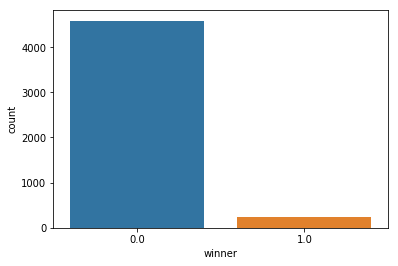

In [130]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='winner', data = df)


In [131]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['winner'] == 0])) #4586
print(len(df.loc[df['winner'] == 1])) #209

4586
235


In [175]:

#balance the data
df_subset_0 = df.loc[df['winner'] == 0]
df_subset_1 = df.loc[df['winner'] == 1]
#df_subset_1['winner']
df_subset_0.drop('winner',axis=1,inplace=True)
df_subset_1.drop('winner',axis=1,inplace=True)

# #sample with replacement
#df_subset_0 = df_subset_0.sample(400) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
#df_subset[df_subset['year2']== 2017.0]
df_new = df_subset.merge(df_all_picture_awards, left_on = 'movie_title', right_on = 'movie_title', how = 'left')
df_new = df_new.fillna(0)
df_new
#df_new[df_new['year2']== 2017.0]

,year_x,ceremony_x,award_x,movieName_x,filmInfo_x,movie_title,budget,cast,crew,genres,...,title,vote_average,vote_count,year2,year_y,ceremony_y,award_y,winner,movieName_y,filmInfo_y
0,1962,35.0,Best Picture,Lawrence of Arabia,"Sam Spiegel, Producer",lawrence of arabia,15000000,"[{""cast_id"": 18, ""character"": ""T.E. Lawrence"",...","[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",...,Lawrence of Arabia,7.8,851,1962.0,1962,35,Best Picture,1.0,Lawrence of Arabia,"Sam Spiegel, Producer"
1,1962,35.0,Best Picture,The Longest Day,"Darryl F. Zanuck, Producer",the longest day,10000000,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",...,The Longest Day,7.2,234,1962.0,1962,35,Best Picture,1.0,The Longest Day,"Darryl F. Zanuck, Producer"
2,1962,35.0,Best Picture,To Kill a Mockingbird,"Alan J. Pakula, Producer",to kill a mockingbird,2000000,"[{""cast_id"": 8, ""character"": ""Atticus Finch"", ...","[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",...,To Kill a Mockingbird,8.0,657,1962.0,1962,35,Best Picture,1.0,To Kill a Mockingbird,"Alan J. Pakula, Producer"
3,1963,36.0,Best Picture,Cleopatra,"Walter Wanger, Producer",cleopatra,31115000,"[{""cast_id"": 2, ""character"": ""Cleopatra"", ""cre...","[{""credit_id"": ""54afb978c3a3683fba003e96"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",...,Cleopatra,6.7,146,1963.0,1963,36,Best Picture,1.0,Cleopatra,"Walter Wanger, Producer"
4,1963,36.0,Best Picture,Tom Jones,"Tony Richardson, Producer",tom jones,1000000,"[{""cast_id"": 6, ""character"": ""Tom Jones"", ""cre...","[{""credit_id"": ""52fe4421c3a36847f8084037"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",...,Tom Jones,6.1,39,1963.0,1963,36,Best Picture,1.0,Tom Jones,"Tony Richardson, Producer"
5,1964,37.0,Best Picture,Dr. Strangelove or: How I Learned to Stop Worr...,"Stanley Kubrick, Producer",dr strangelove or how i learned to stop worryi...,1800000,"[{""cast_id"": 13, ""character"": ""Group Capt. Lio...","[{""credit_id"": ""52fe4290c3a36847f802879d"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",...,Dr. Strangelove or: How I Learned to Stop Worr...,8.0,1442,1964.0,1964,37,Best Picture,1.0,Dr. Strangelove or: How I Learned to Stop Worr...,"Stanley Kubrick, Producer"
6,1964,37.0,Best Picture,Mary Poppins,"Walt Disney and Bill Walsh, Producers",mary poppins,6000000,"[{""cast_id"": 1, ""character"": ""Mary Poppins"", ""...","[{""credit_id"": ""52fe4243c3a36847f8010859"", ""de...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",...,Mary Poppins,7.4,1183,1964.0,1964,37,Best Picture,1.0,Mary Poppins,"Walt Disney and Bill Walsh, Producers"
7,1964,37.0,Best Picture,My Fair Lady,"Jack L. Warner, Producer",my fair lady,17000000,"[{""cast_id"": 1, ""character"": ""Eliza Doolittle""...","[{""credit_id"": ""52fe43fb9251416c75024edb"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n...",...,My Fair Lady,7.4,352,1964.0,1964,37,Best Picture,1.0,My Fair Lady,"Jack L. Warner, Producer"
8,1965,38.0,Best Picture,Doctor Zhivago,"Carlo Ponti, Producer",doctor zhivago,11000000,"[{""cast_id"": 18, ""character"": ""Dr. Yuri Zhivag...","[{""credit_id"": ""52fe428bc3a36847f8026fa1"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",...,Doctor Zhivago,7.4,247,1965.0,1965,38,Best Picture,1.0,Doctor Zhivago,"Carlo Ponti, Producer"
9,1965,38.0,Best Picture,The Sound of Music,"Robert Wise, Producer",the sound of music,8200000,"[{""cast_id"": 1, ""character"": ""Maria"", ""credit_...","[{""credit_id"": ""52fe463b9251416c75071a61"", ""de...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n...",...,The Sound of Music,7.4,941,1965.0,1965,38,Best Picture,1.0,The Sound of Music,"R

In [133]:
print(len(df_new))

635


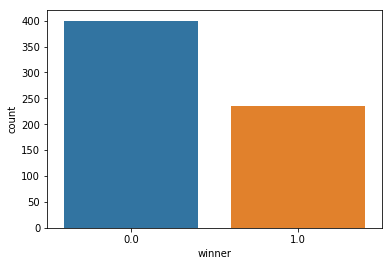

In [134]:
sns.countplot(x='winner', data = df_new)

In [135]:
#check number of null values in the dataset
df_new.isnull().sum()

movie_title             0
budget                  0
cast                    0
crew                    0
genres                  0
keywords                0
movie_id                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
year2                   0
year                    0
ceremony                0
award                   0
winner                  0
movieName               0
filmInfo                0
dtype: int64

In [136]:
#Exploratory Data Analysis

# check the data types and select numeric variables
#df_new['genres'] = (df_new['genres'])
#df_new['genres'] = df_new['genres'].replace({'\'': '"'}, regex=True)
#df_new['cast'] = df_new['cast'].replace({"\'": '"'}, regex=True)
# df_new['cast'] = df_new['cast'].replace("\'", '"')
# for i in range(len(df_new)):
#     df_new['cast'] = json.dumps(df_new.loc[i,'cast'])
#df_new.loc[df_new['year2'] == 2017.0]


In [137]:
df_new.tail()

,movie_title,budget,cast,crew,genres,keywords,movie_id,original_language,original_title,overview,...,title,vote_average,vote_count,year2,year,ceremony,award,winner,movieName,filmInfo
630,the favourite,15000000,"[{'cast_id': 2, 'character': 'Queen Anne', 'cr...","[{'credit_id': '5686461bc3a36828f501471f', 'de...","[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 1025, 'name': 'great britain'}, {'id':...",375262.0,en,The Favourite,"England, early 18th century. The close relatio...",...,The Favourite,7.6,2305,2018.0,2018,91.0,Best Picture,1.0,The Favourite,"Ceci Dempsey, Ed Guiney, Lee Magiday and Yorgo..."
631,green book,23000000,"[{'cast_id': 2, 'character': 'Frank ""Tony Lip""...","[{'credit_id': '5a209ba1925141032c099ee4', 'de...","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","[{'id': 237, 'name': 'gay'}, {'id': 531, 'name...",490132.0,en,Green Book,"Tony Lip, a bouncer in 1962, is hired to drive...",...,Green Book,8.3,3894,2018.0,2018,91.0,Best Picture,1.0,Green Book,"Jim Burke, Charles B. Wessler, Brian Currie, P..."
632,roma,15000000,"[{'cast_id': 4, 'character': 'Cleodegaria ""Cle...","[{'credit_id': '582dcab9925141094e008a99', 'de...","[{'id': 18, 'name': 'Drama'}]","[{'id': 1228, 'name': '1970s'}, {'id': 1547, '...",426426.0,es,Roma,"In 1970s Mexico City, two domestic workers hel...",...,Roma,7.8,1972,2018.0,2018,91.0,Best Picture,1.0,Roma,"Gabriela Rodríguez and Alfonso Cuarón, Producers"
633,a star is born,36000000,"[{'cast_id': 1, 'character': 'Ally Campana', '...","[{'credit_id': '57ea3a02c3a3687edc00080a', 'de...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'id': 727, 'name': 'country music'}, {'id': ...",332562.0,en,A Star Is Born,Seasoned musician Jackson Maine discovers — an...,...,A Star Is Born,7.5,6111,2018.0,2018,91.0,Best Picture,1.0,A Star Is Born,"Bill Gerber, Bradley Cooper and Lynette Howell..."
634,vice,60000000,"[{'cast_id': 1, 'character': 'Dick Cheney', 'c...","[{'credit_id': '58474badc3a368140e0027d7', 'de...","[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 521, 'name': 'washington d.c.'}, {'id'...",429197.0,en,Vice,"George W. Bush picks Dick Cheney, the CEO of H...",...,Vice,7.1,1394,2018.0,2018,91.0,Best Picture,1.0,Vice,"Dede Gardner, Jeremy Kleiner, Adam McKay and K..."


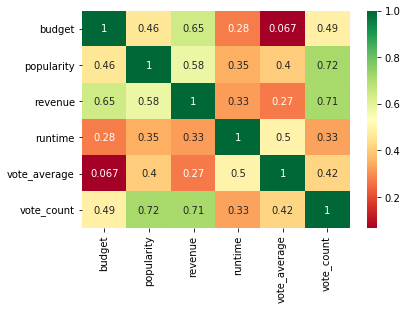

In [138]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)

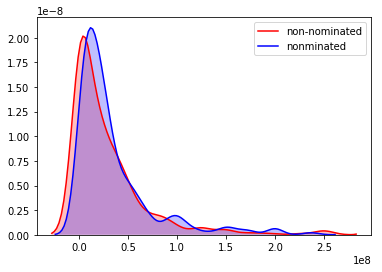

In [139]:
# Density Curve
# budget
budget0 = df_new[df_new['winner'] == 0]['budget']
budget1 = df_new[df_new['winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

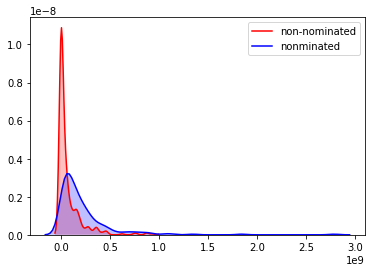

In [140]:
# revenue
# density curve
revenue0 = df_new[df_new['winner'] == 0]['revenue']
revenue1 = df_new[df_new['winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

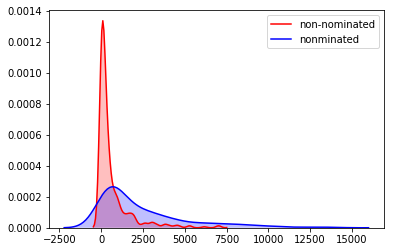

In [141]:
# vote count
vc0 = df_new[df_new['winner'] == 0]['vote_count']
vc1 = df_new[df_new['winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

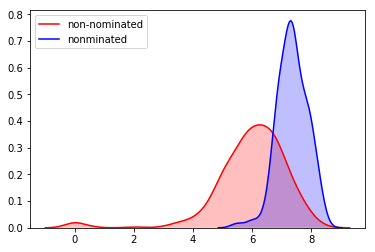

In [142]:
# vote average
va0 = df_new[df_new['winner'] == 0]['vote_average']
va1 = df_new[df_new['winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

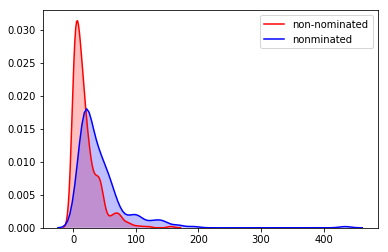

In [143]:
# popularity
popularity0 = df_new[df_new['winner'] == 0]['popularity']
popularity1 = df_new[df_new['winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

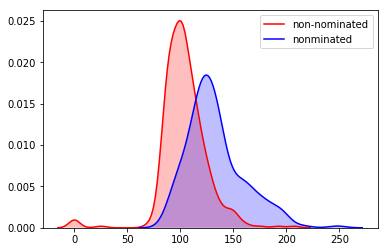

In [144]:
#runtime
runtime0 = df_new[df_new['winner'] == 0]['runtime']
runtime1 = df_new[df_new['winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [145]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    genres = eval(df_new.loc[i,'genres'])
    for it in genres:
        print(it)
        genres_set.add(it['name'])
        if df_new.loc[i,'winner'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df_new.loc[i,'winner'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

{'id': 35, 'name': 'Comedy'}
{'id': 878, 'name': 'Science Fiction'}
{'id': 28, 'name': 'Action'}
{'id': 12, 'name': 'Adventure'}
{'id': 53, 'name': 'Thriller'}
{'id': 18, 'name': 'Drama'}
{'id': 53, 'name': 'Thriller'}
{'id': 14, 'name': 'Fantasy'}
{'id': 18, 'name': 'Drama'}
{'id': 18, 'name': 'Drama'}
{'id': 80, 'name': 'Crime'}
{'id': 53, 'name': 'Thriller'}
{'id': 18, 'name': 'Drama'}
{'id': 10749, 'name': 'Romance'}
{'id': 35, 'name': 'Comedy'}
{'id': 14, 'name': 'Fantasy'}
{'id': 18, 'name': 'Drama'}
{'id': 35, 'name': 'Comedy'}
{'id': 53, 'name': 'Thriller'}
{'id': 10402, 'name': 'Music'}
{'id': 80, 'name': 'Crime'}
{'id': 9648, 'name': 'Mystery'}
{'id': 12, 'name': 'Adventure'}
{'id': 14, 'name': 'Fantasy'}
{'id': 28, 'name': 'Action'}
{'id': 53, 'name': 'Thriller'}
{'id': 878, 'name': 'Science Fiction'}
{'id': 28, 'name': 'Action'}
{'id': 53, 'name': 'Thriller'}
{'id': 18, 'name': 'Drama'}
{'id': 35, 'name': 'Comedy'}
{'id': 10749, 'name': 'Romance'}
{'id': 27, 'name': 'Horror

In [146]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

   TV Movie     Music  Documentary   Fantasy  Adventure   History   Romance  \
0  0.000995  0.013930     0.008955  0.033831   0.059701  0.015920  0.080597   
1  0.000000  0.021544     0.000000  0.028725   0.050269  0.075404  0.095153   

      Drama  Animation     Crime  Thriller    Comedy  Science Fiction  \
0  0.155224   0.018905  0.060697  0.107463  0.157214         0.042786   
1  0.368043   0.003591  0.053860  0.073609  0.066427         0.019749   

        War    Horror    Action   Western   Mystery    Family   Foreign  
0  0.006965  0.052736  0.091542  0.004975  0.040796  0.043781  0.002985  
1  0.043088  0.005386  0.043088  0.012567  0.021544  0.017953  0.000000  


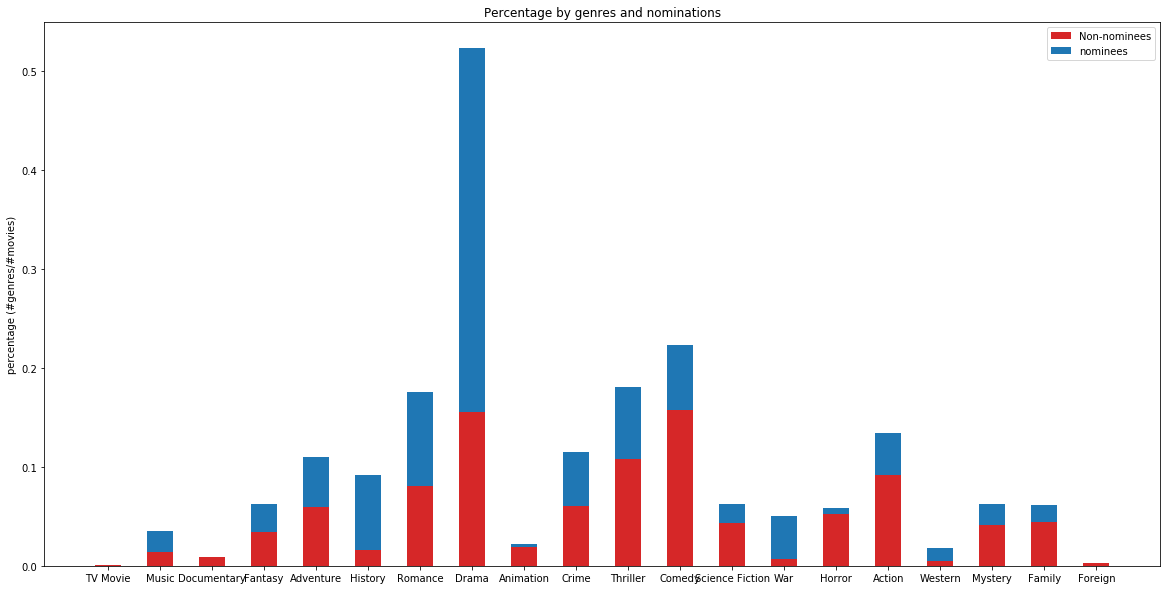

In [147]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [148]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}
    fails = []

    for item in df[column_name]:
        group = eval(item)
        #print(type(group))
        for it in group:
            #print (it)
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        print(item)
        group = eval(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [149]:

df2 = feature_engineering("cast", df_new, "name")
#df2['cast']
df2 = df2.drop(columns=['cast'])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [150]:
# df2[df2['year2']==2017]
df2_2018 = df2[df2['year2']==2018]
#df2_2018

In [151]:
# director
crew_name = {}

for item in df2['crew']:
    crew = eval(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] not in crew_name:
                crew_name[it['name']] = 1
            else:
                crew_name[it['name']]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in crew_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['crew']:
    crew = eval(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] in final_crew:
                index = final_crew[it['name']]
                np_crew[row][index] = 1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [152]:
# df3.dtypes
# df3.genres

In [153]:
df3=df3.drop(['crew'],axis=1)
# #genres
df4 = feature_engineering("genres", df3, "name")
df4
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)
# drop the columns not used
df_clean = df8.drop(["movie_title","original_title","overview","tagline",'title','original_language','status','release_date','movieName','filmInfo','award'],axis=1)


[{"id": 35, "name": "Comedy"}]
[{"id": 878, "name": "Science Fiction"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 53, "name": "Thriller"}]
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]
[{"id": 14, "name": "Fantasy"}, {"id": 18, "name": "Drama"}]
[{"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}, {"id": 53, "name": "Thriller"}]
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]
[{"id": 35, "name": "Comedy"}, {"id": 14, "name": "Fantasy"}]
[{"id": 18, "name": "Drama"}]
[{"id": 35, "name": "Comedy"}, {"id": 53, "name": "Thriller"}, {"id": 10402, "name": "Music"}, {"id": 80, "name": "Crime"}, {"id": 9648, "name": "Mystery"}]
[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}, {"id": 878, "name": "Science Fiction"}]
[{"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}]
[{"id": 18, "name": "Drama"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "n

[{"id": 396, "name": "transporter"}, {"id": 1252, "name": "suicide attempt"}, {"id": 2660, "name": "strong woman"}, {"id": 2792, "name": "boxer"}, {"id": 3737, "name": "dying and death"}, {"id": 4327, "name": "stroke of fate"}, {"id": 4613, "name": "training"}, {"id": 5212, "name": "advancement"}, {"id": 6075, "name": "sport"}, {"id": 11322, "name": "female protagonist"}, {"id": 156330, "name": "boxing trainer"}, {"id": 207999, "name": "determination"}]
[{"id": 577, "name": "black people"}, {"id": 634, "name": "soul"}, {"id": 727, "name": "country music"}, {"id": 963, "name": "loss of brother"}, {"id": 1228, "name": "1970s"}, {"id": 1416, "name": "jazz"}, {"id": 1741, "name": "blindness and impaired vision"}, {"id": 2495, "name": "georgia"}, {"id": 2635, "name": "overdose"}, {"id": 2776, "name": "bus ride"}, {"id": 4746, "name": "record producer"}, {"id": 5565, "name": "biography"}, {"id": 5626, "name": "from rags to riches"}, {"id": 5707, "name": "childhood trauma"}, {"id": 5708, "nam

[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "DE", "name": "Germany"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "FR", "name": "France"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "FR", "name": "France"}, {"iso_3166_1": "IT", "name": "Italy"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "FR", "name": "France"}]
[{"iso_3166_1": "CA", "name": "Canada"}, {"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]
[{"iso_3166_

[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "ja", "name": "\u65e5\u672c\u8a9e"}]
[{"iso_639_1": "fr", "name": "Fran\u00e7ais"}, {"iso_639_1": "no", "name": "Norsk"}, {"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\u00e7ais"}, {"iso_639_1": "ru", "name": "P\u0443\u0441\u0441\u043a\u0438\u0439"}]
[{"iso_639_1": "en", "name": "English"}]
[]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}]
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "it", "name": "Italiano"}]
[{"iso_639_1": "da", "name": "Dansk"}, {"iso_6

In [154]:
df_clean.drop_duplicates()
df_clean

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,year2,year,ceremony,...,hy,sv,ta,no,vi,sw,yi,ga,ko,xh
0,25000000,0.0,14.604911,119772232,104.0,5.7,210,2012.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000000,0.0,21.605533,67312826,117.0,6.1,479,2002.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000000,0.0,34.938177,70000000,137.0,7.9,958,2006.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,2.470443,0,115.0,6.6,48,2015.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6000000,0.0,64.025031,23341568,106.0,8.1,3254,1995.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,32000000,0.0,9.976428,0,101.0,6.7,89,2003.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,35000000,0.0,23.835055,93246388,109.0,6.0,436,2010.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,13800000,0.0,17.339300,52293982,119.0,6.7,291,1986.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8000000,0.0,8.204829,0,111.0,6.9,196,2002.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,25000000,0.0,8.178203,48063435,108.0,5.4,138,1994.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
#df_clean
#df_clean['winner'].loc[df_clean['year2'] == 2018]
#df_16 = df_clean.loc[df_clean['year2'] == 2016]
df_2017  = df_clean.loc[df_clean['year2'] != 2018]
#df_2017 = df_2017.drop_duplicates(['movie_id'])
# #df_1617 = df_16.append(df_17)
# df_1617 = df_1617.drop_duplicates(['movie_id'])
# df_1617
df_2018  = df_clean.loc[df_clean['year2'] == 2018]
df_2018 = df_2018.drop_duplicates(['movie_id'])
df_2018.head()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,year2,year,ceremony,...,hy,sv,ta,no,vi,sw,yi,ga,ko,xh
627,200000000,284054.0,44.448,1346739107,134.0,7.4,12853,2018.0,2018,91.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
628,15000000,487558.0,23.198,48686605,135.0,7.6,3380,2018.0,2018,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,52000000,424694.0,38.226,894027543,135.0,8.1,8175,2018.0,2018,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,15000000,375262.0,18.011,82124805,120.0,7.6,2305,2018.0,2018,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,23000000,490132.0,25.057,319700000,130.0,8.3,3894,2018.0,2018,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df_2017

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,year2,year,ceremony,...,hy,sv,ta,no,vi,sw,yi,ga,ko,xh
0,25000000,0.0,14.604911,119772232,104.0,5.7,210,2012.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000000,0.0,21.605533,67312826,117.0,6.1,479,2002.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000000,0.0,34.938177,70000000,137.0,7.9,958,2006.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,2.470443,0,115.0,6.6,48,2015.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6000000,0.0,64.025031,23341568,106.0,8.1,3254,1995.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,32000000,0.0,9.976428,0,101.0,6.7,89,2003.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,35000000,0.0,23.835055,93246388,109.0,6.0,436,2010.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,13800000,0.0,17.339300,52293982,119.0,6.7,291,1986.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8000000,0.0,8.204829,0,111.0,6.9,196,2002.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,25000000,0.0,8.178203,48063435,108.0,5.4,138,1994.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Model Training
# split
X_train = df_2017[df_2017.columns.difference(['winner'])]
# X = StandardScaler().fit_transform(X)
y_train = df_2017['winner']
# from sklearn.model_selection import train_test_split
# X_train, y_train,X_test,y_test = train_test_split(X, y,  test_size=1/7.0, random_state=0)

X_test_2018 = df_2018[df_2018.columns.difference(['winner'])]
y_test_2018 = df_2018['winner']
print(X_train)
#from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
#X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=1/7.0, random_state=0)

     1492 Pictures  18th century  1930s  1940s  1950s  1960s  1970s  1980s  \
0              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9              0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10             0.0           0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11             0.0           0.0    0.0    0.0    0.0    0.0    

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854],
       [-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854],
       [-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854],
       ...,
       [-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854],
       [-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854],
       [-0.08012831, -0.03996804, -0.06933752, ..., -0.08965816,
        -0.05656854, -0.05656854]])

In [159]:
scaler.fit(X_test_2018)
X_test_scaled = scaler.transform(X_test_2018)
X_test_scaled

array([[ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.37796447,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
from sklearn.decomposition import PCA
pca = PCA(0.85)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)
X_train_pca
X_test_pca

array([[-0.36806995, -0.50501136, -0.0036155 , ..., -0.29639492,
         0.43165568, -0.12925822],
       [ 0.36350944,  0.13672979, -0.05805848, ..., -0.0858999 ,
        -0.31320259,  0.10298351],
       [ 0.04203645, -0.04253604,  0.13351769, ...,  0.19212723,
         0.17333896, -0.08007303],
       ...,
       [ 0.05994888,  0.2412527 , -0.55988915, ...,  0.14429611,
         0.00675186,  0.11515279],
       [-0.16281656,  0.17255682, -0.41913234, ...,  0.02839619,
        -0.224564  , -0.03658997],
       [ 0.03872622, -0.22511386,  0.39424857, ..., -0.0013262 ,
        -0.02310048,  0.03867032]])

In [161]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
logisticRegr.score(X_train_pca, y_train)

1.0

In [163]:
# Predict for One Observation

predicted = logisticRegr.predict(X_test_pca)
df_2018['prediction'] = predicted
print(logisticRegr.predict(X_test_pca))
#print(logisticRegr.predict(X_test))
#print(y_test.index)
# df8['movie_title'][y_test.index]

[0. 0. 1. 0. 1. 0. 1. 0.]


In [164]:
logisticRegr.score(X_test_pca, y_test_2018)
# print(predicted)

0.375

In [165]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_2018, predicted).ravel()
sensitivity = tp/(tp+fn)
print(tp) # 0.84375

3


In [166]:
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.7751010491916065
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])

NameError: name 'X' is not defined

In [167]:
print(len(predicted))

8


In [168]:
df_p2018 = df_2018[['movie_id','winner','prediction']]
df_p2018

,movie_id,winner,prediction
627,284054.0,1.0,0.0
628,487558.0,1.0,0.0
629,424694.0,1.0,1.0
630,375262.0,1.0,0.0
631,490132.0,1.0,1.0
632,426426.0,1.0,0.0
633,332562.0,1.0,1.0
634,429197.0,1.0,0.0


In [169]:
df_prediction = df_p2018.merge(df3, on='movie_id', how='left')
df_prediction[['movie_title','winner_x','prediction']]

,movie_title,winner_x,prediction
0,black panther,1.0,0.0
1,blackkklansman,1.0,0.0
2,bohemian rhapsody,1.0,1.0
3,the favourite,1.0,0.0
4,green book,1.0,1.0
5,roma,1.0,0.0
6,a star is born,1.0,1.0
7,vice,1.0,0.0
